In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from scipy import optimize

In [257]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
X_train = train.iloc[:,1:785]
y_train = train.iloc[:,0]

In [259]:
y_train

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [267]:
X_train = X_train.to_numpy()

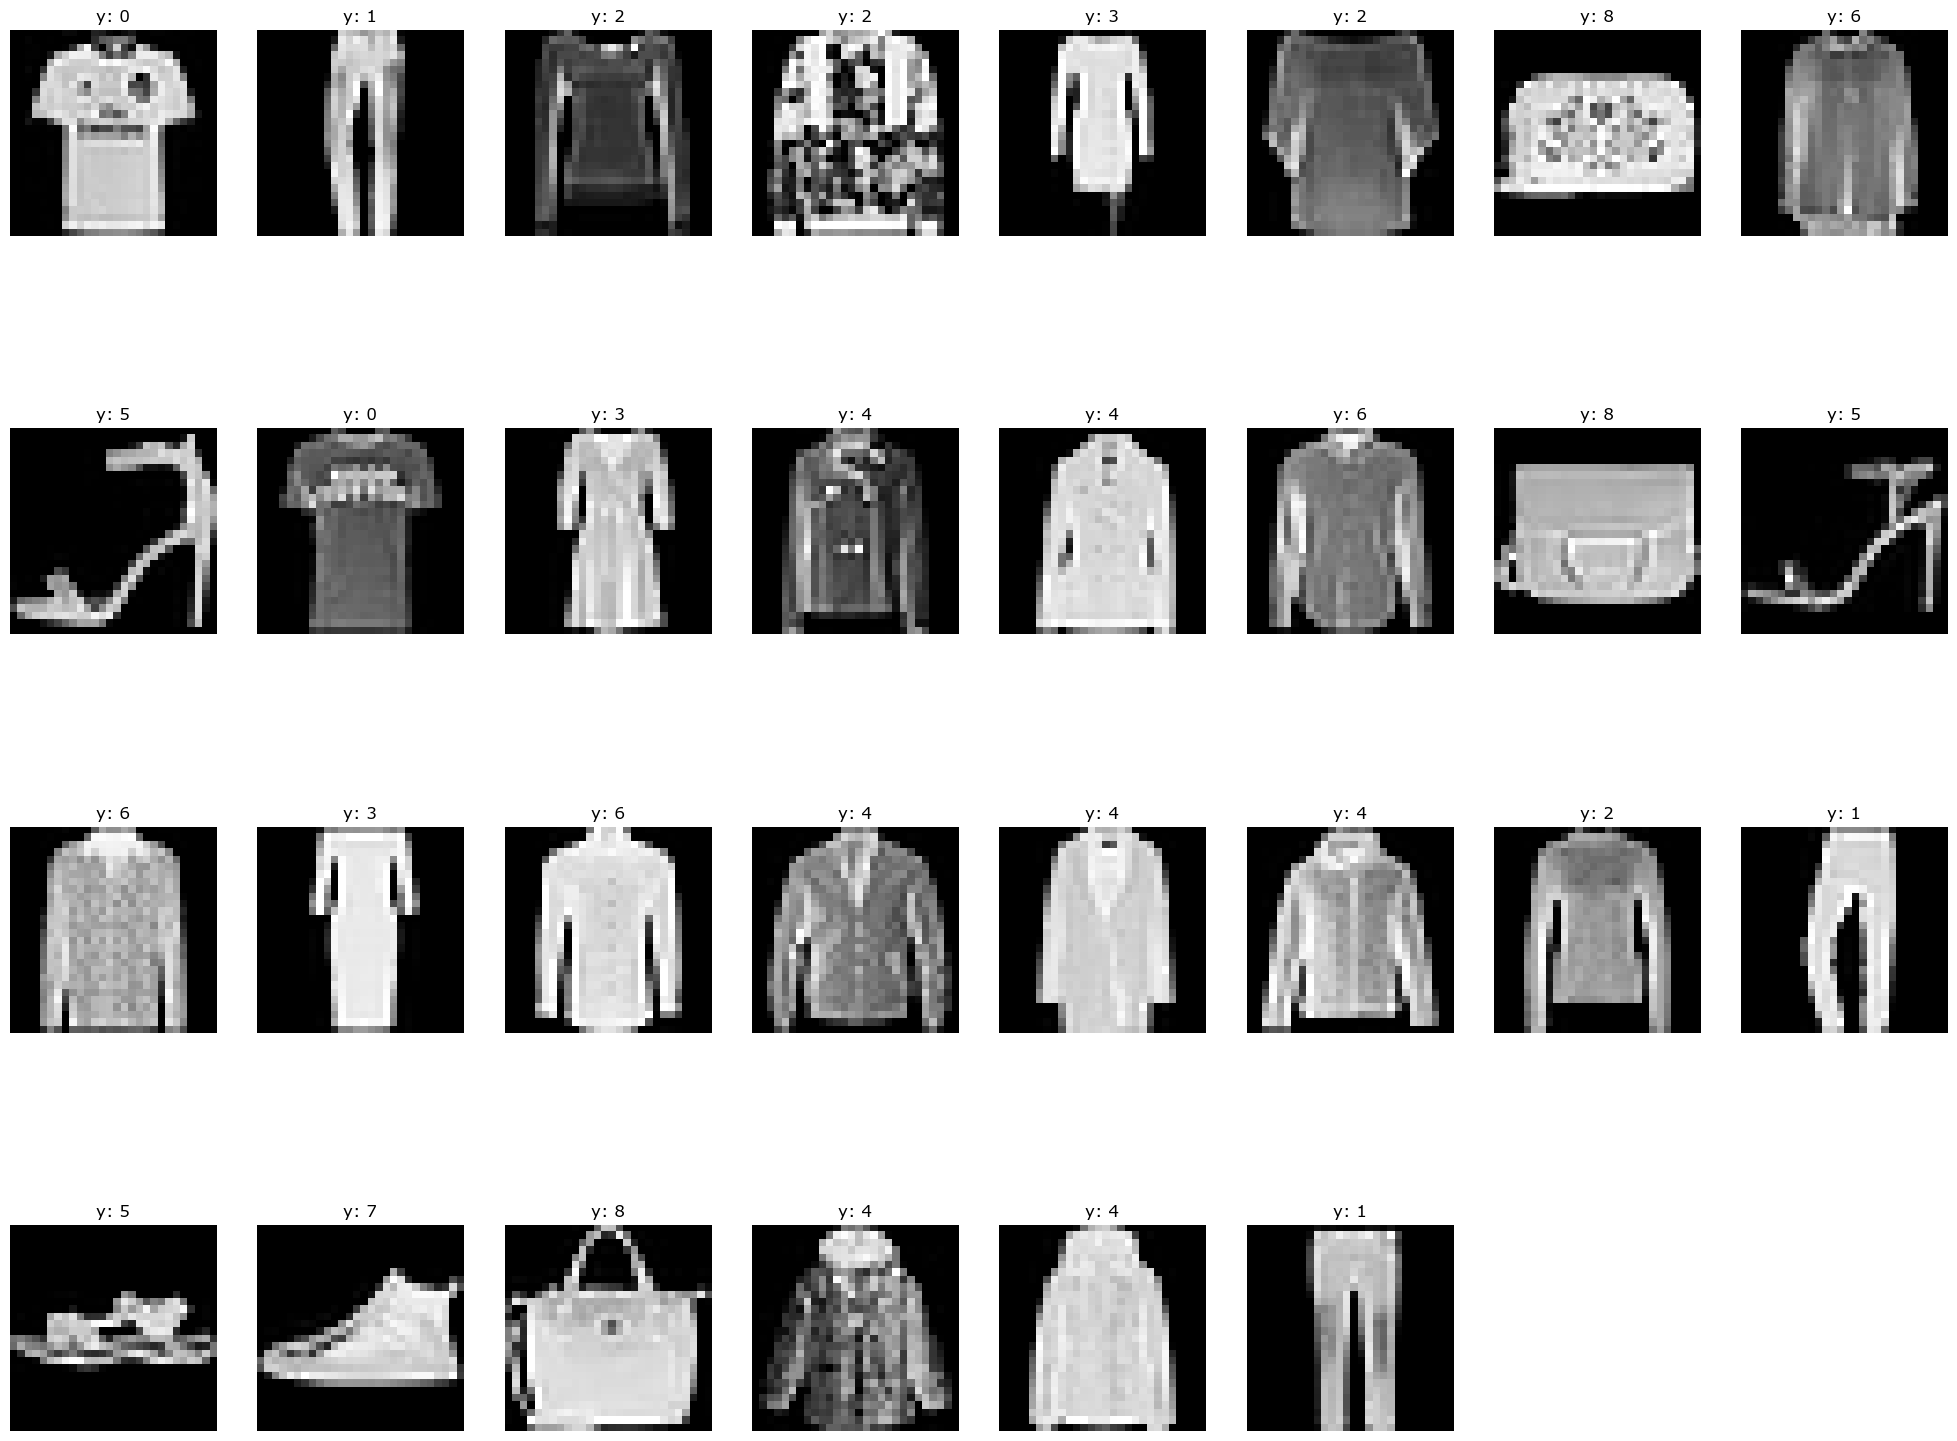

In [241]:
fig = plt.figure(figsize=(25,25))
for i in range(30):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title('y: {y}'.format(y=y_train[i]))
    plt.axis('off')

In [268]:
def one_hot(y, c):
    
    y_one_hot = np.zeros((len(y), c))
    
    y_one_hot[np.arange(len(y)), y] = 1
    
    return y_one_hot

In [269]:
def softmax(z):
    
    exp = np.exp(z - np.max(z))
    
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

**Batch Gradient Descent**

In [270]:
def BGD(X, y, lr, c, epochs):
    
    m, n = X.shape
    
    w = np.random.random((n, c))
    b = np.random.random(c)
    losses = []
    
    for epoch in range(epochs):
        
        z = X@w + b
        y_pred = softmax(z)
        
        y_one_hot = one_hot(y, c)
        
        
        w_grad = (1/m)*np.dot(X.T, (y_pred - y_one_hot)) 
        b_grad = (1/m)*np.sum(y_pred - y_one_hot)
        
        
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        loss = -np.mean(np.log(y_pred[np.arange(len(y)), y]))
        losses.append(loss) 
        if epoch%100==0:
            print('Epoch: {epoch} || Loss: {loss}'
                  .format(epoch=epoch, loss=loss))
    return w, b, losses

In [271]:
X_train = X_train/255

In [272]:
w, b, l = BGD(X_train, y_train, lr=0.9, c=10, epochs=1000)

Epoch: 0 || Loss: 4.997608150883853
Epoch: 100 || Loss: 1.5647747068632698
Epoch: 200 || Loss: 1.4569942509097153
Epoch: 300 || Loss: 1.8408958875794557
Epoch: 400 || Loss: 0.7176382923616627
Epoch: 500 || Loss: 1.0154875385411977
Epoch: 600 || Loss: 0.8910085929794921
Epoch: 700 || Loss: 0.9347742940238257
Epoch: 800 || Loss: 0.9053811934296797
Epoch: 900 || Loss: 0.9323883968338276


In [275]:
def predict(X, w, b):
    z = X@w + b
    y_pred = softmax(z)
    
    return np.argmax(y_pred, axis=1)

In [276]:
def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

In [277]:
y_preds = predict(X_train, w, b)
print("Training Accuracy: " , accuracy(y_train, y_preds))

Training Accuracy:  0.8299


Text(0, 0.5, 'Loss')

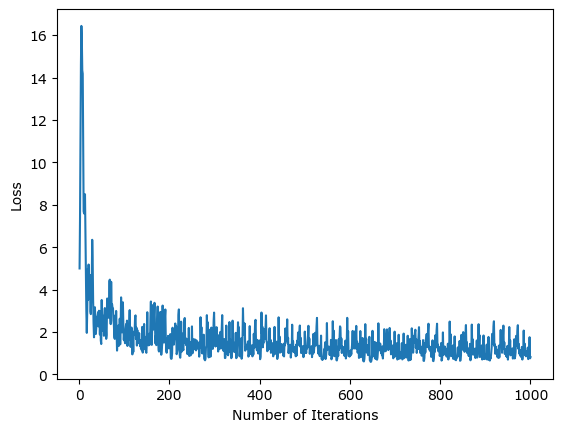

In [278]:
plt.plot(np.arange(1,len(l)+1,1),l)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")

**Testing Data**

In [279]:
X_test = test.iloc[:,1:785]
y_test = test.iloc[:,0]

In [280]:
X_test = X_test.to_numpy()

In [281]:

X_test = X_test/255

In [282]:
X_test.shape

(30, 784)

In [283]:
test_preds = predict(X_test, w, b)
accuracy(y_test, test_preds)

0.8333333333333334

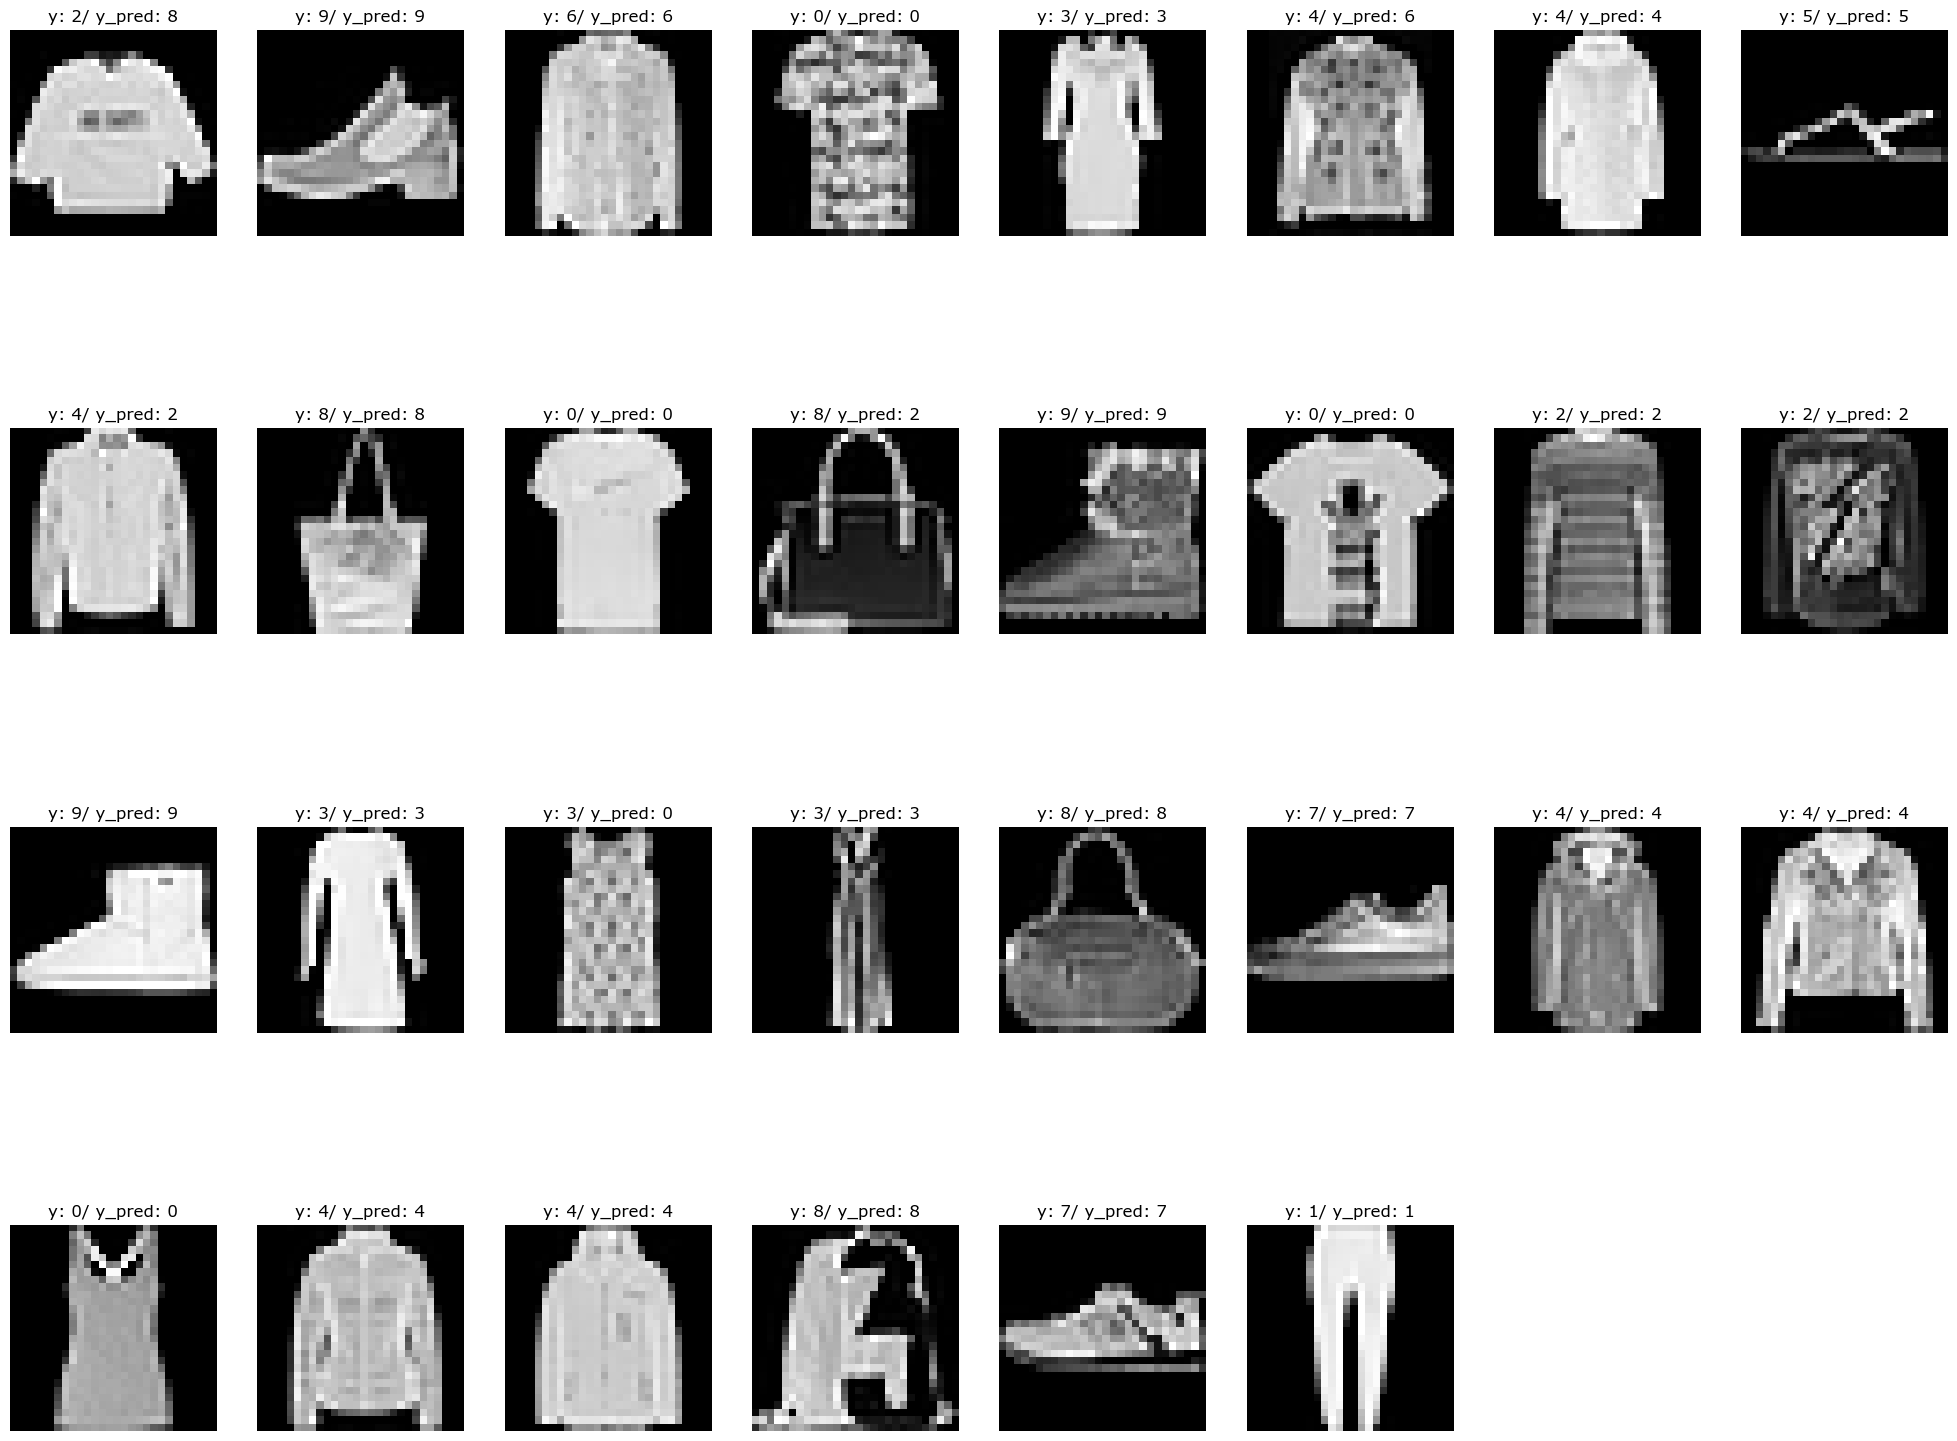

In [284]:
fig = plt.figure(figsize=(25,25))
for i in range(30):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title('y: {y}/ y_pred: {y_pred}'.format(y=y_test[i], y_pred=test_preds[i]))
    plt.axis('off')
    

**Comparing with One v Rest**

In [210]:
        
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
m = X_train.shape[0]
def costFunction(w, X, y):
    
    h = sigmoid(np.dot(X,w))
    J = -1/m * np.sum(y*np.log(h)+ (1-y)*np.log(1-h))
    grad = 1/m *(np.dot(X.T, h-y))
    
    return J,grad

def predict(w_optimized, X):
    
    z = np.dot(X,w_optimized)
    p1  = sigmoid(z)
    p = np.round(p1)
    
    return p


In [211]:
def one_hot(y, c):
    
    y_one_hot = np.zeros((len(y), c))
    
    y_one_hot[np.arange(len(y)), y] = 1
    
    return y_one_hot

In [217]:
m = X_train.shape[0]
X = np.concatenate([np.ones((m,1)), X_train], axis = 1)

In [214]:
y1 = one_hot(y_train,10)
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [218]:
Xn = X/255

In [219]:
w0 = np.ones(28*28+1)
options = {'maxiter' : 5000}
loss_list = []
wa = []

        
for i in range(0,10):
    
    res = optimize.minimize(fun=costFunction, x0=w0, args=(Xn, y1[:,i]),method = 'CG', jac=True, options=options)
    w_opt = res.x
    wa.append(w_opt)

**Making predictions on Test Set using Optimized weights**

In [225]:
m = X_test.shape[0]
Xt = np.concatenate([np.ones((m,1)), X_test], axis = 1)
Xt = Xt/255

In [226]:
pre= []
av = []
for c in range(0,10):
    y_pred = predict(wa[c],Xt)
    pre.append(y_pred)
    k = 0
    for i in range(len(y_test)):
        if y_test[i]==c:
            if y_test[i]==y_pred[i]:
                k = k+1
        else:
            if y_pred[i]==0:
                k=k+1
    av.append(k/len(y_test))
    print("Accuracy for class: ",c, " :" ,k/len(y_test)) 

Accuracy for class:  0  : 0.8666666666666667
Accuracy for class:  1  : 0.9666666666666667
Accuracy for class:  2  : 0.9
Accuracy for class:  3  : 0.8666666666666667
Accuracy for class:  4  : 0.7666666666666667
Accuracy for class:  5  : 0.9666666666666667
Accuracy for class:  6  : 0.9666666666666667
Accuracy for class:  7  : 0.9333333333333333
Accuracy for class:  8  : 0.8666666666666667
Accuracy for class:  9  : 0.9


In [227]:

def mean(avg):
    a=0
    for i in range(len(avg)):
    
        a = a + avg[i]
    return(a/len(avg))
        

In [229]:
print("Mean Accuracy for all classes: ", mean(av))

Mean Accuracy for all classes:  0.9000000000000001


**OneVsRest is performing better than Softmax because I used Batch GD without regularization and I may be overfitting the training data. In OnevRest optimization was done using Scipy**